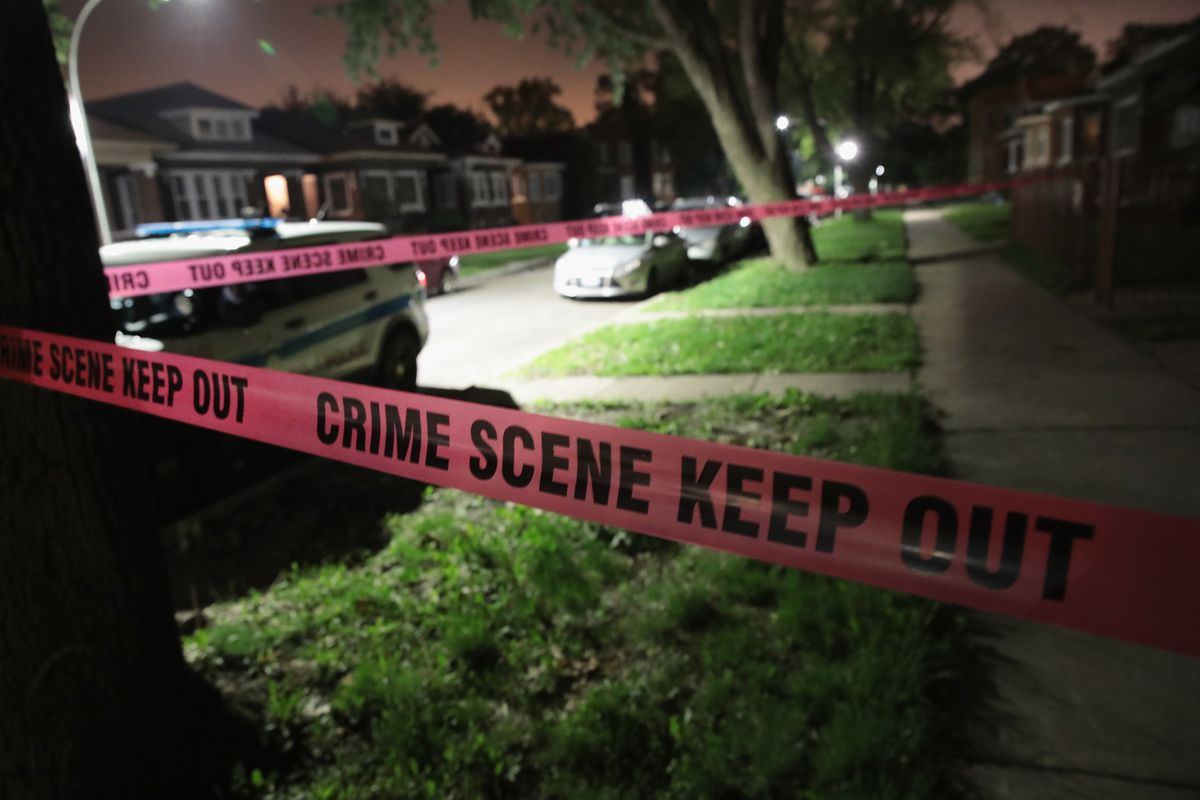

In [4]:
from IPython.display import Image
Image(filename='data/chicago.jpg',width = "800",height = "200")

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

import thanh as t
plt.style.use('seaborn')
%matplotlib inline

In [2]:
df = pd.read_csv('data/Chicago_Merged.csv', index_col =False)
df = df.dropna()
df = df.drop(df.columns.values[0], axis = 1)

C:\Users\nctha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Police Districts,Police Beats,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,10778514.0,HZ544820,2016-12-08 17:23:00,079XX S MAY ST,0820,THEFT,$500 AND UNDER,APARTMENT,False,True,...,20.0,230.0,Auburn Gresham,4.0,27.6,28.3,18.5,41.9,15528.0,74.0
1,11411914.0,JB390837,2018-08-12 22:00:00,013XX W 76TH ST,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,20.0,230.0,Auburn Gresham,4.0,27.6,28.3,18.5,41.9,15528.0,74.0
2,11510038.0,JB519570,2018-11-17 14:49:00,079XX S BISHOP ST,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,STREET,False,False,...,20.0,230.0,Auburn Gresham,4.0,27.6,28.3,18.5,41.9,15528.0,74.0
3,11495832.0,JB500163,2018-11-02 08:20:00,083XX S HALSTED ST,0484,BATTERY,PRO EMP HANDS NO/MIN INJURY,STREET,False,True,...,20.0,236.0,Auburn Gresham,4.0,27.6,28.3,18.5,41.9,15528.0,74.0
4,11501552.0,JB508324,2018-11-08 11:00:00,087XX S RACINE AVE,0810,THEFT,OVER $500,SIDEWALK,False,False,...,9.0,244.0,Auburn Gresham,4.0,27.6,28.3,18.5,41.9,15528.0,74.0


### Types of crime in Chicago that are noticed in this project are:
 * <span style="color:blue"> ***THEFT*** </span>: Steal something which belongs to someone else.
 * <span style="color:blue"> ***BATTERY*** </span>: Cause physical harm to another person.
 * <span style="color:blue"> ***CRIMINAL*** </span>: Destroying or damaging property.
 * <span style="color:blue"> ***ASSAULT*** </span>: Threaten physical harm to another person.
 * <span style="color:blue"> ***DECEPTIVE*** </span>: Attempt to deceive or defraud a person or business. 
 * <span style="color:blue"> ***BURGLARY*** </span>: Breaking into someone's house with the intent of stealing.
 * <span style="color:blue"> ***ROBBERY*** </span>: Stealing from someone with threats of violence (e.g. mugging).

### Crime with more violence:
* <span style="color:blue"> ***BATTERY*** </span> 
* <span style="color:blue"> ***ASSAULT*** </span>
* <span style="color:blue"> ***ROBBERY*** </span>
* <span style="color:blue"> ***CRIMINAL SEXUAL ASSAULT*** </span>
* <span style="color:blue"> ***KIDNAPPING*** </span>
* <span style="color:blue"> ***HOMICIDE*** </span> : Homicide is the act of one human killing another
* <span style="color:blue"> ***ARSON*** </span> : The criminal act of deliberately setting fire to property.

In [4]:
violent_crime = df[df['Primary Type'].isin(
    ['BATTERY', 'ASSAULT', 'ROBBERY', 'CRIM SEXUAL ASSAULT', 'HOMICIDE', 'KIDNAPPING', 'ARSON'])]
nonviolent_crime = df[~df['Primary Type'].isin(
    ['BATTERY', 'ASSAULT', 'ROBBERY', 'CRIM SEXUAL ASSAULT', 'HOMICIDE', 'KIDNAPPING', 'ARSON'])]

### <span style="color:blue"> ***The two plots below shows the "percentage of crimes along with their type" and "number of crimes respectively with their type".*** </span> 

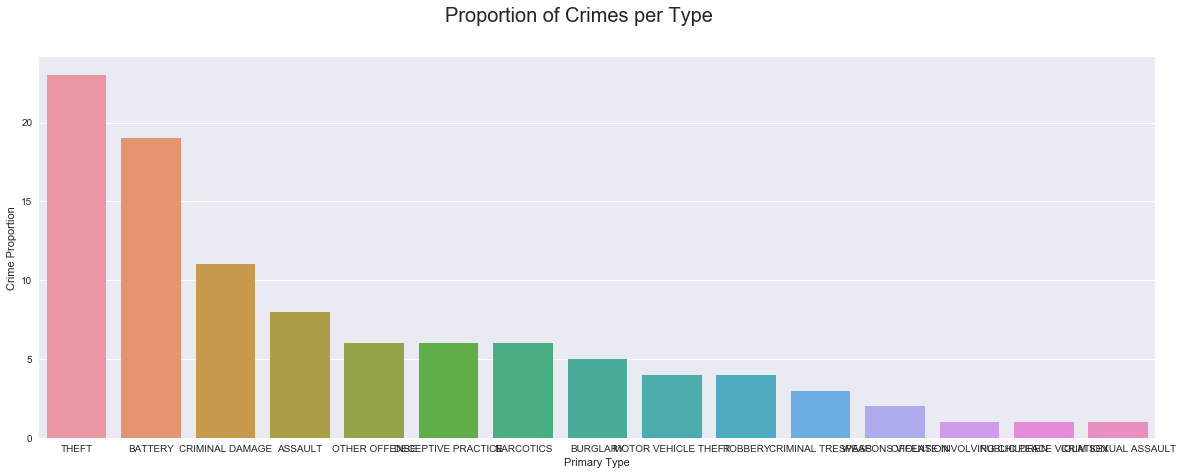

In [5]:
df_all_count = t.crime_proximity(df, 'Primary Type', 0.1)
t.crime_proximity_bar(df_all_count, 'Percentage')

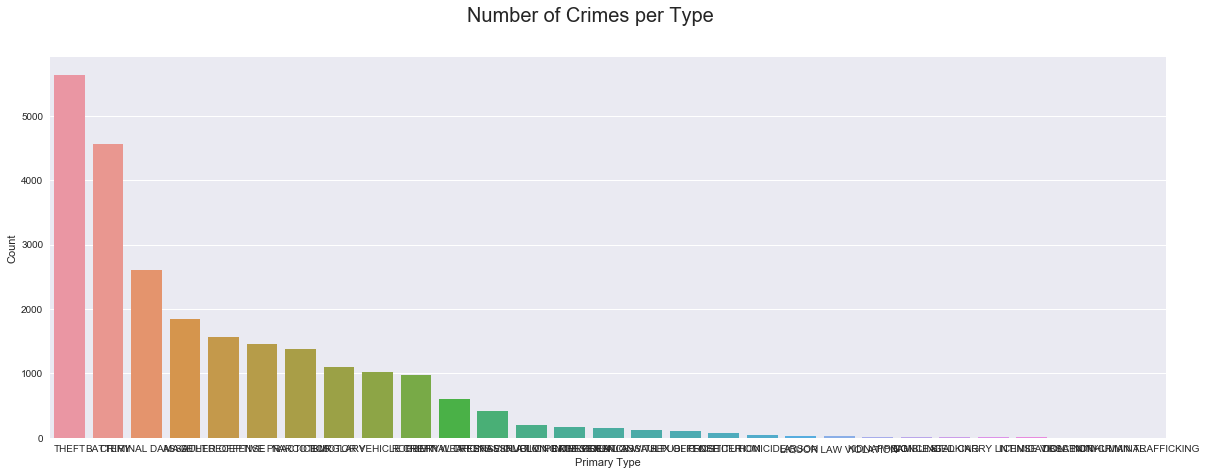

In [6]:
names = df['Primary Type'].value_counts().keys().tolist()
counts = df['Primary Type'].value_counts().tolist()
df_count = pd.DataFrame()
df_count['Primary Type'] = names
df_count['Count'] = counts
df_count.head(3)

fig, axes = plt.subplots(ncols = 1, figsize = (20,7))
sns.barplot(y = df_count['Count'], x = df_count['Primary Type'], ax = axes)
axes.set_xlabel("Crime Count")
axes.set_xlabel("Primary Type")
fig.suptitle('Number of Crimes per Type', fontsize=20)
plt.show()

## <span style="color:blue"> ***Problems and Challenges faced with above plots.*** </span> 

A considerable amount of discrepancy can be seen in the above plot( *Number of crimes with its types*). 
Therefore, if an input vector is provided and any classification is to be done for predicting certain types of crime that could occur, it will become impossible because of following reasons:

1. There are 29 labels which will make classification of training sets difficult.This in turn would lead to prediction with low accuracy.

2. A big gap can be noticed amongst different types of crime.This would lead the predicted outcome to be more leaned towards the label(crime) which has occurred more or which accounts for majority of data. 



##  <span style="color:blue"> ***Dealing with problems and challenges.*** </span> 

1. **Reducing the number of "Potential Labels"**:

    - The types of crime will be further divided into two subgroups(violent crimes and non-violent crimes). 
    - The classification of types of crime will be done to determine the appropriate training set. This will be done for both the subgroups.However, it will be seen that there are certain types of crime which account for low proportion of total number of crimes. Therefor we decide to remove all those types which have a proportion less thatn 5 %. Hence, the training and testing data will not contain the labels which occur less than 5% of time.
    - *Violent Crimes* - The labels which will be used are :BATTERY(60%),ASSAULT(24%),ROBBERY(12%).
    - *Non-Violent Crimes* - The labels which will be used are : THEFT(34%), CRIMINAL DAMAGE(15%), OTHER OFFENSE(9%), DECEPTIVE PRACTICE(8%), NARCOTICS(8%), BURGLARY(6%), MOTOR VEHICLE THEFT(6%)
    
2. **Reducing the biased predictions which are witnessed due to certain labels having a majority of observations in the    data.**:
    - 2.1 Before implementing "data-balancing" we will make use of "F1-score metric" to examine the performance of various classification models. Since, F1 score is more suitable for skewed data sets we will not be using accuracy. 
    - 2.2 Addition of weights such as class weights to create a bias towards minority classes will help in performing and assessing different classification models using both F1-score and accuracy. 
    - 2.3 Using SMOTE (Synthetic Minority Over-sampling Technique) to oversample the minority classes will help in performing and assessing different classification models using both F1-score and accuracy. 

**After reducing the number of potential labels and biased predictions we observe the following graphs:**

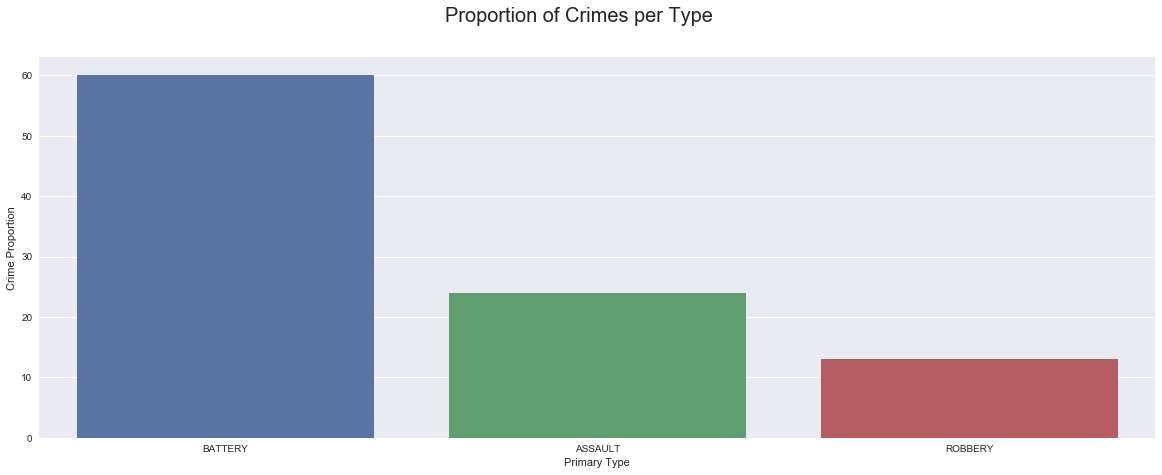

In [10]:
df_violent_count = t.crime_proximity(violent_crime, 'Primary Type', 5)
t.crime_proximity_bar(df_violent_count, 'Percentage')


**When it comes to violent crime, battery is witnessed way more than other crimes. This might be due to the fact that affecting someone physically (for example hitting) is found easy by criminals and hence performed. This is followed ny assault and robbery respectively.**

In [12]:
violent_crime.columns.values

array(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic',
       'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards',
       'Boundaries - ZIP Codes', 'Police Districts', 'Police Beats',
       'COMMUNITY AREA NAME', 'PERCENT OF HOUSING CROWDED',
       'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'], dtype=object)

In [13]:
target = violent_crime['Primary Type']
features = violent_crime[['Arrest', 'Domestic', 'Community Area', 'Latitude', 'Longitude', 'PERCENT OF HOUSING CROWDED',
       'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX']]
features.head()

,Arrest,Domestic,Community Area,Latitude,Longitude,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
1,False,True,71.0,41.755924,-87.657434,4.0,27.6,28.3,18.5,41.9,15528.0,74.0
3,False,True,71.0,41.742901,-87.643815,4.0,27.6,28.3,18.5,41.9,15528.0,74.0
6,True,True,71.0,41.752897,-87.671997,4.0,27.6,28.3,18.5,41.9,15528.0,74.0
7,False,True,71.0,41.753590,-87.652606,4.0,27.6,28.3,18.5,41.9,15528.0,74.0
9,True,False,71.0,41.755202,-87.645373,4.0,27.6,28.3,18.5,41.9,15528.0,74.0


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X = features
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

logi = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 10000)
logi.fit(X_train, y_train)
print("Training set F1-score:", f1_score(y_train, logi.predict(X_train),  average='micro'))
print("Test set F1-score:", f1_score(y_test, logi.predict(X_test),  average='micro'))

Training set F1-score: 0.5967063770147162
Test set F1-score: 0.6100893326326853


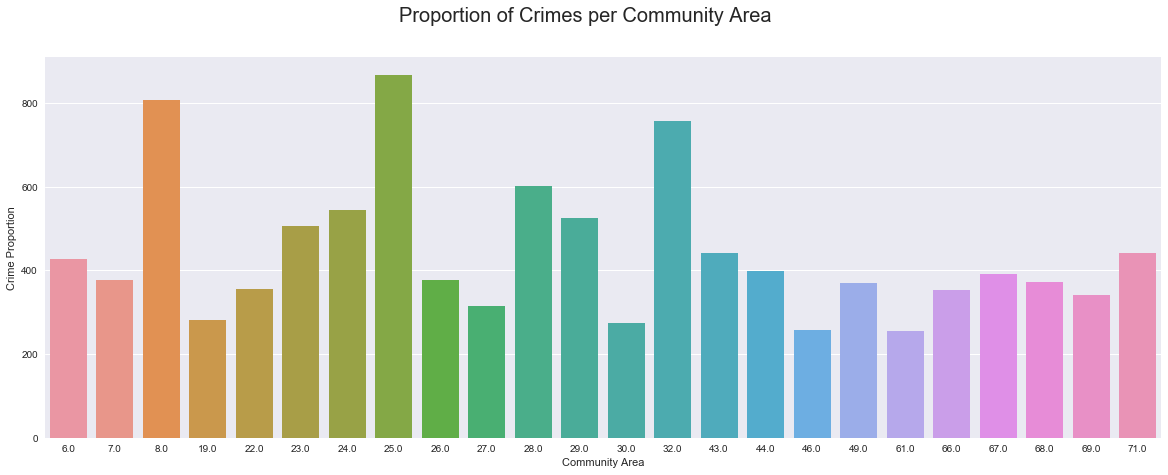

In [15]:
df_comm_area_count = t.crime_proximity(nonviolent_crime, 'Community Area', 1.5)
t.community_proximity_bar(df_comm_area_count, 'Count')

**In case of non violent crime, the community area (8,25 and 32) face the maximum crimes as compared to other areas. This may be due to absence of security, presence of uneducated,jobless people in that particular area.**

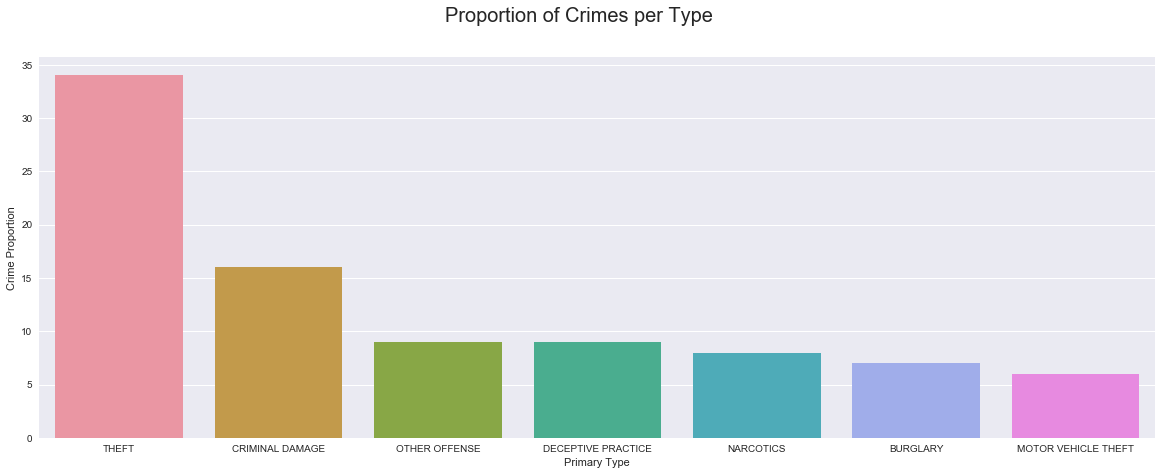

In [17]:
df_nonviolent_count = t.crime_proximity(nonviolent_crime, 'Primary Type', 5)
t.crime_proximity_bar(df_nonviolent_count, 'Percentage')

In [18]:
total_count = df_count['Count'].sum()
df_count['Percentage'] = df_count.apply(lambda row: int(round(100*row['Count']/total_count, 0)), axis=1)


In [19]:
#df_count.head(5)

In [20]:
#df_filtered = df_count[df_count['Percentage'] > 4]
#df_filtered.head(10)

In [21]:
#df['Location Description'].value_counts()

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

In [23]:
X = violent_crime['Primary Type']
features = np.array(list(i for i in violent_crime.columns.values 
                         if i != 'Primary Type'))
y = violent_crime[features]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 5)

List of features that are currently in the dataframe

# Change to pie chart

##  <span style="color:blue"> ***Here , we are dealing with the fact that whether the arrest was made after the complaint was filed*** </span> 

**In case of non violent crime, although the complaint was filed the arrest was not made in maximum cases(78% of total of them). This may have happened due to the absence of security forces which may cater to all the complaints.**

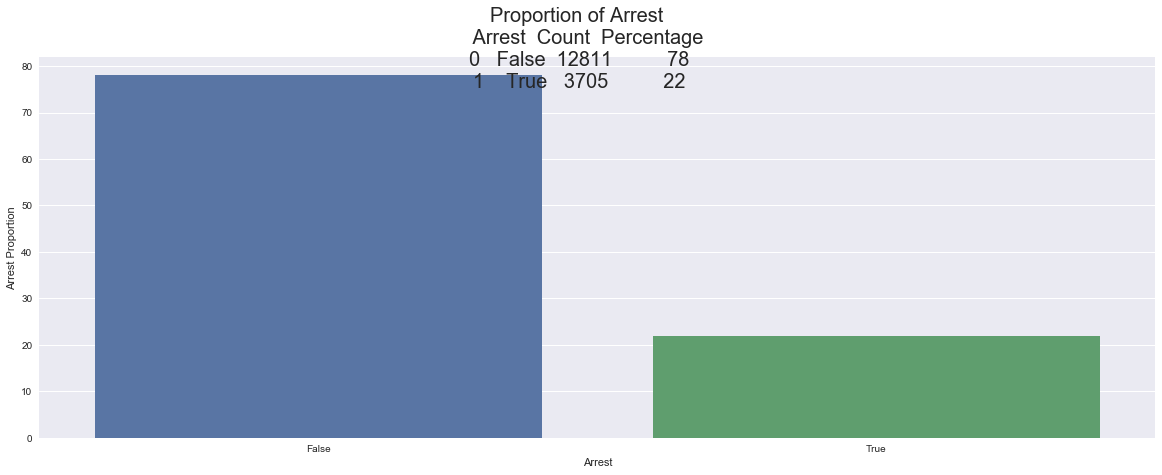

In [24]:
df_nonviolent_arrest = t.crime_proximity(nonviolent_crime, 'Arrest', 0)
df_nonviolent_arrest.head()
t.arrest_proximity_bar(df_nonviolent_arrest, 'Percentage')

**In case of violent crime, almost 81% of total arrests were not made even though the crime was reported.This is a huge number and this situation might have occurred due to the lineant police present in Chicago.** 

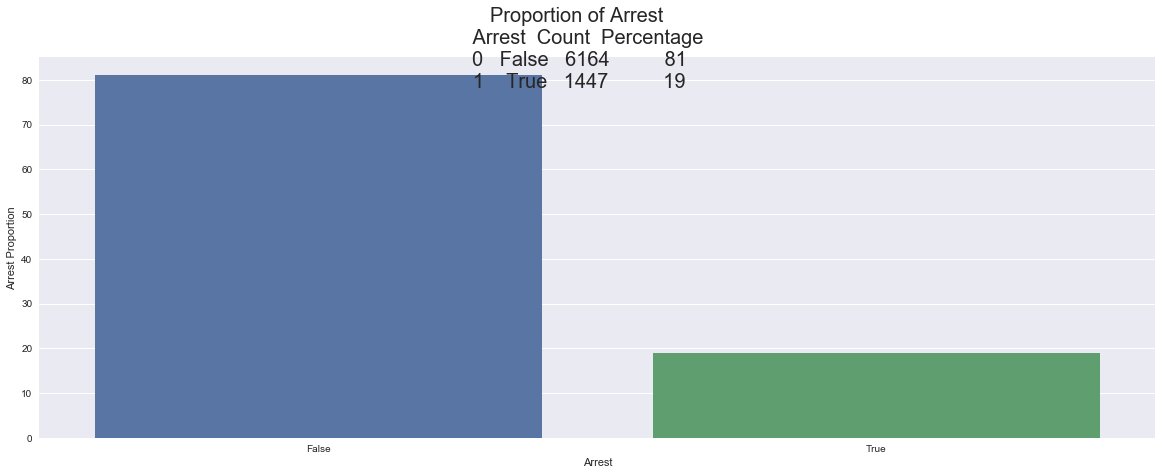

In [25]:
df_violent_arrest = t.crime_proximity(violent_crime, 'Arrest', 0)
df_violent_arrest.head()
t.arrest_proximity_bar(df_violent_arrest, 'Percentage')

### INFERENCES:
A very small percentage of arrest in the 2 categories can be noticed above, and are similar enough. This indicates that there is not a certain emphasis of the police force on solving either sub-groups of crime. 

The generally low arrest rate could be due to lack of funding for law enforcement, which renders the police force unable to resolve so many crimes.



### <span style="color:blue"> ***The following function  helps us to determine the percentage of crime distribution in top five community areas(Austin,Near North Side,Loop,Near West Side, North Lawndale).*** </span>

In [26]:
def distribution(data, description):
    names = data.value_counts().keys().tolist()
    counts = data.value_counts().tolist()
    total = len(data)
    print(description)
    for i in range(5):
        print('{}: {}'.format(names[i], counts[i]))
    print()

In [27]:
print('Top 5 community areas for crime\n')
distribution(df['COMMUNITY AREA NAME'], 'All Crime')
distribution(violent_crime['COMMUNITY AREA NAME'], 'Violent Crime')
distribution(nonviolent_crime['COMMUNITY AREA NAME'], 'Nonviolent Crime')

Top 5 community areas for crime

All Crime
Austin: 1409
Near North Side: 1020
Loop: 907
Near West Side: 804
North Lawndale: 791

Violent Crime
Austin: 543
South Shore: 327
North Lawndale: 267
Auburn Gresham: 258
Humboldt park: 253

Nonviolent Crime
Austin: 866
Near North Side: 806
Loop: 758
Near West Side: 602
West Town: 545



### INFERENCES:
The highest number of crimes occur in Austin followed by Near North Side, Loop, Near West Side, North Lawndale. This may be due to the absence of police stations, isolated areas, unemployment, poverty which in some cases may lead to attempt in crime like robbery, theft, assault and other crimes. 

## <span style="color:blue"> **DATA PRE-PROCESSING** </span>




***One-hot Encoding*** : One hot encoding is a process of converting categorical variables into a form that is provided to machine learning algorithm to do a easier job. 
In this project, we are using one-hot encoder to convert following features:
* *Location Description*: The describes about location of crime.
* *Community Area* : Name of the community are where crime occurred.
* *Primary Type* : The type of crime committed.

In [28]:
oh_enc = OneHotEncoder(sparse=False)
location_description_enc = oh_enc.fit_transform(df['Location Description'].values.reshape(-1, 1))
print(location_description_enc[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [29]:
oh_enc = OneHotEncoder(sparse=False)
community_area_enc = oh_enc.fit_transform(df['COMMUNITY AREA NAME'].values.reshape(-1, 1))
print(community_area_enc[0])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [30]:
oh_enc = OneHotEncoder(sparse=False)
crime_type_enc = oh_enc.fit_transform(df['Primary Type'].values.reshape(-1, 1))
print(crime_type_enc[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0.]


***Ordinal Encoding***- This uses a single column to represent classes. Here, ordinal encoding is a string ( True or False) which states  whether the police have made an arrest for this crime. We will convert this feature using an original encoder so that it can be used in a machine learning model.

In [31]:
ord_enc = OrdinalEncoder()
arrest_ord_enc = ord_enc.fit_transform(df['Arrest'].values.reshape(-1, 1))

In [32]:
ord_enc = OrdinalEncoder()
domestic_ord_enc = ord_enc.fit_transform(df['Domestic'].values.reshape(-1, 1))

***Bucketing*** - Bucketing means putting in different categories. A new feature 'income' is being created from the 'per capita income' where 'high', 'medium' and 'low' are identified as buckets. 
* *An inbuilt library from sklearn- "KBinsDiscretizer" is being used.*

In [33]:
def bin_edges(d):
    print('Ranges of each bin:')
    print('Bin 0: {} to {}\nBin 1: {} to {}\nBin 2: {} to {}'.format(d[0], d[1], d[1], d[2], d[2], d[3]))

In [34]:
# Create new feature: income bucket
# Buckets are: high, medium, and low
disc = KBinsDiscretizer(n_bins=3, encode='ordinal')
bucket_income = disc.fit_transform(df['PER CAPITA INCOME '].values.reshape(-1, 1))
bin_edges(disc.bin_edges_[0])
df['bucket_income'] = bucket_income
print('\nDistribution of values in bins:')
print(df['bucket_income'].value_counts())

Ranges of each bin:
Bin 0: 8201.0 to 15957.0
Bin 1: 15957.0 to 24336.0
Bin 2: 24336.0 to 88669.0

Distribution of values in bins:
1.0    8266
2.0    8213
0.0    7648
Name: bucket_income, dtype: int64


In [35]:
disc = KBinsDiscretizer(n_bins=5, encode='onehot-dense')
bucket_latitude = disc.fit_transform(df['Latitude'].values.reshape(-1, 1))
disc = KBinsDiscretizer(n_bins=5, encode='onehot-dense')
bucket_longitude = disc.fit_transform(df['Longitude'].values.reshape(-1, 1))

## <span style="color:blue"> **CREATING SYNTHETIC FEATURES** </span>
### Feature Engineering: 
Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. Synthetic features is a form of feature engineering. We create folloeing features:
* Time of day
* Weekend
* Violent crime

In [36]:
def time_of_day(x):
    time = x[-8:]
    hour = int(time[:2])
    if hour <= 6:
        return 'early morning'
    if hour > 6 and hour < 18:
        return 'day'
    return 'night'

df['hour'] = df['Date'].map(lambda x: time_of_day(x))
df['hour'].value_counts()

day              12452
night             7510
early morning     4165
Name: hour, dtype: int64

In [37]:
oh_enc = OneHotEncoder(sparse=False)
hour_enc = oh_enc.fit_transform(df['hour'].values.reshape(-1, 1))

In [38]:
def is_weekend(x):
    dt = datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    day = dt.weekday()
    if day < 5:
        return 0
    return 1

In [39]:
df['is_weekend'] = df['Date'].map(lambda x: is_weekend(x))
df['is_weekend'].value_counts()

0    17247
1     6880
Name: is_weekend, dtype: int64

In [40]:
weekend_enc = df['is_weekend'].values.reshape(-1, 1)

In [41]:
def is_violent(x):
    if x in ['BATTERY', 'ASSAULT', 'ROBBERY', 'CRIM SEXUAL ASSAULT', 'HOMICIDE', 'KIDNAPPING', 'ARSON']:
        return 1
    return 0

In [42]:
df['is_violent'] = df['Primary Type'].map(lambda x: is_violent(x))
df['is_violent'].value_counts()

0    16516
1     7611
Name: is_violent, dtype: int64

In [43]:
violent_enc = df['is_violent'].values.reshape(-1, 1)

## <span style="color:blue"> **Predicting Violent Crime From data** </span>
Here , this is a multi classification hence,the instances are classified into three classes.

#### ***Creating training and testing data***
The training data is the one on which we implement the model amd train it and evaluation of data is done with the help of testing data.
The processed data is combined into 'X (features) array' and 'y (labels) array'. This will then be split into train and test sets by the sklearn train_test_split function.
* **Logistic regression**-Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression is estimating the parameters of a logistic model (a form of binary regression).
* **Support vector Machine**-Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.
* **K nearest neighbors**-KNN is a non-parametric, lazy learning algorithm. When we say a technique is non-parametric, it means that it does not make any assumptions about the underlying data. In other words, it makes its selection based off of the proximity to other data points regardless of what feature the numerical values represent. Being a lazy learning algorithm implies that there is little to no training phase. Therefore, we can immediately classify new data points as they present themselves.
* **Neural Network**-Neural networks (NN), also called artificial neural networks (ANN) are a subset of learning algorithms within the machine learning field that are loosely based on the concept of biological neural networks.Basically, an ANN comprises of the following components: 
- An input layer that receives data and pass it on
- A hidden layer
- An output layer
- Weights between the layers




In [44]:
X = np.concatenate((arrest_ord_enc, hour_enc, weekend_enc, violent_enc, domestic_ord_enc, location_description_enc, crime_type_enc, bucket_latitude, bucket_longitude), axis=1)
y = bucket_income
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), random_state=1)

#### ***Models***
The baseline model would be Logistic Regression which will be comopared with K-nearest neighbors model,support vector machines model and a neural network model.

In [45]:
model = LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.718501326259947


In [46]:
svm_model = SVC(gamma='auto')
svm_model.fit(X_train, y_train)
print(svm_model.score(X_test, y_test))

0.6856763925729443


In [47]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print(knn_model.score(X_test, y_test))

0.7050729442970822


In [48]:
nn_model = MLPClassifier(random_state=0, max_iter=200)
nn_model.fit(X_train, y_train)
print(nn_model.score(X_test, y_test))

0.7393899204244032


C:\Users\nctha\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**Out of all the the models, the best accuracy score is of a neural network model hence we continue with it.**

In [49]:
train_scores = []
test_scores = []
iterations = []

for i in range(200, 1001, 200):
    mlp = MLPClassifier(random_state=0, max_iter=i)
    mlp.fit(X_train, y_train)
    train_scores.append(mlp.score(X_train, y_train))
    test_scores.append(mlp.score(X_test, y_test))
    iterations.append(i)

C:\Users\nctha\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\nctha\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**Here, we draw a figure to report the accuray on the training data and test data both with differnt number of iterations ranging from 200-1000.**

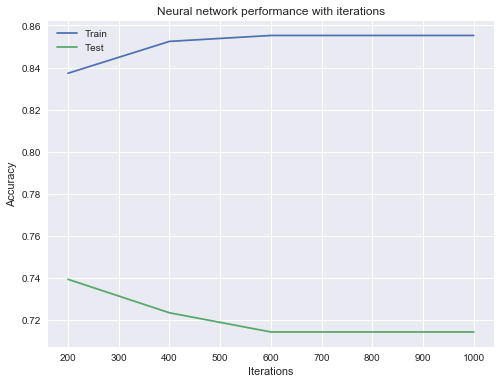

In [50]:
plt.figure(figsize=(8, 6))    
plt.plot(iterations, train_scores, label='Train')
plt.plot(iterations, test_scores, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title('Neural network performance with iterations')
leg = plt.legend()
plt.grid(True)
plt.show()

**Iteration Observations**  
Despite the complaints of the model not reaching convergence, the best result for test accuracy is actually the lowest number of iterations. Above 200 iterations the model seems to start overfitting the training data.

In [51]:
train_scores = []
test_scores = []
solvers = ['lbfgs','sgd', 'adam']
for i in solvers:
    mlp = MLPClassifier(solver=i, random_state=0)
    mlp.fit(X_train, y_train)
    train_scores.append(mlp.score(X_train, y_train))
    test_scores.append(mlp.score(X_test, y_test))

C:\Users\nctha\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\nctha\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**Here, we draw a figure to report the accuray on the training data and test data both with differnt solvers. ['lbfgs','sgd', 'adam'].**

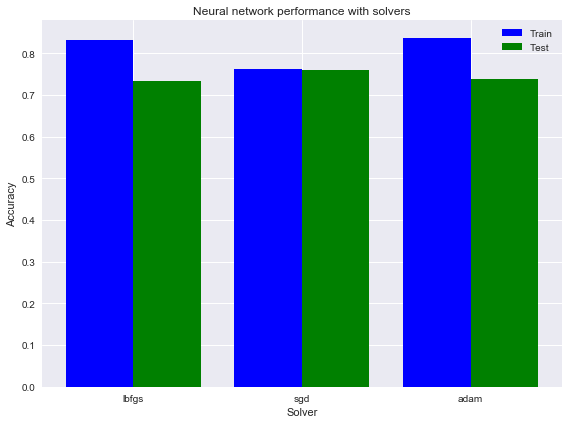

In [52]:
n_groups = 3
index = np.arange(n_groups)
plt.figure(figsize=(8, 6))
bar_width = 0.4
plt.bar(index, train_scores, bar_width, color='b', label='Train')
plt.bar(index + bar_width, test_scores, bar_width, color='g', label='Test')
plt.ylabel('Accuracy')
plt.xlabel('Solver')
plt.title('Neural network performance with solvers')
leg = plt.legend()
plt.xticks(index + bar_width/2, solvers)
plt.grid(True)
plt.tight_layout()
plt.show()

**Solver observations**  
There's little difference between the three solvers on the test accuracy.

## <span style="color:blue"> **Predicting Violent Crime From data** </span>
This is a binary classification problem.

In [53]:
X = np.concatenate((arrest_ord_enc, hour_enc, weekend_enc, domestic_ord_enc, location_description_enc, bucket_latitude, bucket_longitude, community_area_enc, bucket_income), axis=1)
y = df['is_violent'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [54]:
print(len(X[0]))

199


In [55]:
model = LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.7664124668435013


In [56]:
svm_model = SVC(gamma='auto')
svm_model.fit(X_train, y_train)
print(svm_model.score(X_test, y_test))

0.7420424403183024


In [57]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print(knn_model.score(X_test, y_test))

0.7122015915119363


In [58]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
print(nb_model.score(X_test, y_test))

0.7327586206896551


The size of the input vector is 199, so the sizes of the hidden layers are set as: 150, 100, 50, and 25.

In [59]:
nn_model = MLPClassifier(hidden_layer_sizes=(150,100,50,25), random_state=0)
nn_model.fit(X_train, y_train)
print(nn_model.score(X_test, y_test))

0.7296087533156499
